# Project description:

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

**Data Description**

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

# TOC

- [Project description:](#Project-description:)
- [TOC](#TOC)
- [1. Imports and building project plan](#1.-Imports-and-building-project-plan)
    * [1.1. Loading data](#1.1.-Loading-data)
    * [1.2. Merging dataframes](#1.2.-Merging-dataframes)
    * [1.3. Exploration of the data](#1.3.-Exploration-of-the-data)
- [Project Plan:](#Project-Plan:)
- [2. Data preprocessing](#2.-Data-preprocessing)
    * [2.1. Filling NaNs](#2.1.-Filling-NaNs)
    * [2.2. Converting categorical](#2.2.-Converting-categorical)
        + [2.2.1. Converting Yes/No to boolean](#2.2.1.-Converting-Yes/No-to-boolean)
        + [2.2.2. Converting EndDate to binary and filling it](#2.2.2.-Converting-EndDate-to-binary-and-filling-it)
        + [2.2.3. Frequency encoding Type, PaymentMethod and InternetService](#2.2.3.-Frequency-encoding-Type,-PaymentMethod-and-InternetService)
    * [2.3. Converting datatypes](#2.3.-Converting-datatypes)
        + [2.3.1. Casting BeginDates](#2.3.1.-Casting-BeginDates)
        + [2.3.2. Casting TotalCharges](#2.3.2.-Casting-TotalCharges)
        + [2.3.3. int64 -> unit8](#2.3.3.-int64-->-unit8)
    * [2.4. Investigating duplicates](#2.4.-Investigating-duplicates)
    * [2.5. Dropping CustomerID](#2.5.-Dropping-CustomerID)
    * [2.6. Calculating duration](#2.6.-Calculating-duration)
    * [2.7. Calculating Change in Contract](#2.7.-Calculating-Change-in-Contract)
- [3. EDA](#3.-EDA)
    * [3.1. Check Class balance](#3.1.-Check-Class-balance)
    * [3.2. Corellation matrix](#3.2.-Corellation-matrix)
    * [3.2. Influence of boolean categories](#3.2.-Influence-of-boolean-categories)
    * [3.3. Boxplots Total and Monthly charges](#3.3.-Boxplots-Total-and-Monthly-charges)
    * [3.4. Contracts over the year](#3.4.-Contracts-over-the-year)
- [4. Dropping non necessary columns](#4.-Dropping-non-necessary-columns)
- [5. Model Building](#5.-Model-Building)
    * [5.1. Data splitting](#5.1.-Data-splitting)
    * [5.2. Dealing with class imbalance](#5.2.-Dealing-with-class-imbalance)
        + [5.2.1. Upsameling](#5.2.1.-Upsameling)
        + [5.2.2. Downsampeling](#5.2.2.-Downsampeling)
        + [5.2.3. Class weig](#5.2.3.-Class-weig)
    * [5.3. Model selection](#5.3.-Model-selection)
    * [5.4 Model development](#5.4-Model-development)
        + [5.4.1. Logreg](#5.4.1.-Logreg)
            - [5.4.1.1. Baseline standard classifier](#5.4.1.1.-Baseline-standard-classifier)
            - [5.4.1.2. Hyperparameter Tuning](#5.4.1.2.-Hyperparameter-Tuning)
        + [5.4.2. SVC](#5.4.2.-SVC)
            - [5.4.2.1. Baseline standard classifier](#5.4.2.1.-Baseline-standard-classifier)
            - [5.4.2.2. Hyperparameter Tuning](#5.4.2.2.-Hyperparameter-Tuning)
        + [5.4.3. RFC](#5.4.3.-RFC)
            - [5.4.3.1. Baseline standard classifier](#5.4.3.1.-Baseline-standard-classifier)
        + [5.4.3.2. Hyperparameter Tuning](#5.4.3.2.-Hyperparameter-Tuning)
        + [5.4.4. GBM](#5.4.4.-GBM)
            - [5.4.4.1. Baseline standard classifier](#5.4.4.1.-Baseline-standard-classifier)
            - [5.4.4.2. Hyper Parameter Tuning](#5.4.4.2.-Hyper-Parameter-Tuning)
        + [5.4.5. LightGBM](#5.4.5.-LightGBM)
            - [5.4.5.1. Baseline standard classifier](#5.4.5.1.-Baseline-standard-classifier)
            - [5.4.5.2. Hyperparameter Tuning first round](#5.4.5.2.-Hyperparameter-Tuning-first-round)
            - [5.4.5.3. Hyperparameter Tuning second round](#5.4.5.3.-Hyperparameter-Tuning-second-round)
        + [5.4.6. XGBoost](#5.4.6.-XGBoost)
            - [5.4.6.1. Baseline standard classifier](#5.4.6.1.-Baseline-standard-classifier)
            - [5.4.6.2. Hyperparameter tining first round](#5.4.6.2.-Hyperparameter-tining-first-round)
            - [5.4.6.4. Hyperparameter tuning second round](#5.4.6.4.-Hyperparameter-tuning-second-round)
- [6. Fazit](#6.-Fazit)

# 1. Imports and building project plan

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
%matplotlib inline

import joblib

from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

import lightgbm as lgb
import xgboost as xgb

# Activate autocomplete
%config Completer.use_jedi = False

RANDOM_STATE = 42

C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.1. Loading data

> In this step the four dataframes are loaded sequentially

In [2]:
try:
    df_contract = pd.read_csv('./01_data/contract.csv')
    df_personal = pd.read_csv('./01_data/personal.csv')
    df_internet = pd.read_csv('./01_data/internet.csv')
    df_phone = pd.read_csv('./01_data/phone.csv')
except:
    df_contract = pd.read_csv('datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('datasets/final_provider/phone.csv')
    
dfs = [df_contract, df_personal, df_internet, df_phone]

## 1.2. Merging dataframes

> In this step the various dataframes have been explored slightly to check how they could be merged.  
> Finally the dataframes have been merged on the CustomerID column and missing values have been filled with nans

In [3]:
# Investigating dataframes
for df in dfs:
    display(df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [4]:
# Merging data on customerID
df_merged = reduce(lambda left,right: pd.merge(left,
                                               right,
                                               on=['customerID'],
                                               how='outer'), dfs)
df_merged

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


## 1.3. Exploration of the data

> In this step te previusly merged dataframe has been investigated with regard to:
> - Missing values
> - Datatypes
> - Count of unice categorical values
> - range of features of dataset

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [6]:
df_merged.nunique()

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
MultipleLines          2
dtype: int64

In [7]:
df_merged.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [8]:
df_merged[['BeginDate', 'EndDate']].min()

BeginDate             2013-10-01
EndDate      2019-10-01 00:00:00
dtype: object

In [9]:
df_merged[['BeginDate', 'EndDate']].max()

BeginDate    2020-02-01
EndDate              No
dtype: object

In [10]:
df_merged.loc[df_merged.EndDate != 'No', 'EndDate'].drop_duplicates()

2     2019-12-01 00:00:00
4     2019-11-01 00:00:00
13    2019-10-01 00:00:00
47    2020-01-01 00:00:00
Name: EndDate, dtype: object

> **Observations:**
> - Dates can be converted to datetime
> - Binary Cathegoricals (nunique == 2) can be converted to bool (0,1)
> - Categorization of Type/PaymentMethod
> - Surprisningly few Begin and end dates
> - Filling of NAN values with no
> - Conversion of monthly and total charges to int for faster computing later on possible

> \-\> Based on that information a Project plan has been developed

# Project Plan:
1. Download the data  
2. Merge the Dataframes on customerID  
3. Data Preprocessing:  
    3.1. Fill missing Values with No (Because only categorical yes/no and missing indicates that that oprion is not choosen)  
    3.2. Convert datatypes (str -> bool, str -> datetime, float -> int)  
    3.3. Add Features:  
        3.3.1. Duration  
        3.3.2. Change in Plan  
        3.3.3. Combine paperless billing and billing method to one feature (maybe dropping paperlessBilling)  
4. EDA  
    4.1. Check for outliers and distribution (continous features and dates)  
    4.2. Check correllation between features (and tareget)  
    4.3. Checking balance of target (No vs. End date) -> Maybe later up/down - sampeling or weighting needed  
    4.4. Check beginning and end dates  
5. Data Split  
    5.1. Split data in Train Test with ratio 60:40 (Model Builing and Hyperparameter tuning with CV so no valid set, else split 6:2:2)  
    5.2. Check if distribution in test & train set are equal  
    5.3. Up/down sampling, weighting  
6. Model Building  
    6.1. Perform cv to find best performant classifiers (try and evaluate multiple)  
    6.2. Build baseline model  
    6.3. Select best 3 algorithms and build model there  
    6.4. Hyperparameter tuning via random grid search and grid search  
    6.5. Evaluation  
7. Project summary  

The Metric to use is the requested roc auc score together with accuracy.
Those scores are used in this task cause its a classification task (churn / no churn)

# 2. Data preprocessing

## 2.1. Filling NaNs

> As already determined, there are only nan values in categorical yes or no features.  
> They are coming from missing customer IDs during the merging of the dataframes (internet and phone dataframes)   
> Those missing values have been filled with No

In [11]:
# Filling Nans
df_merged.fillna('No', inplace=True)

# Checking if filling was successfull
any(df_merged.isna().max())

False

## 2.2. Converting categorical

### 2.2.1. Converting Yes/No to boolean

> In this step the Yes/No, Female/Male, and the End date will be converted into boolean values

In [12]:
# Defining mappings
mappings= {
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
}

# Aggregating all binary columns to convert
binary_cols = df_merged.loc[:, df_merged.nunique()==2].columns
binary_cols = [ele for ele in binary_cols if ele != 'SeniorCitizen']
df_merged.loc[:, binary_cols].head(2)

,PaperlessBilling,gender,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Yes,Female,Yes,No,No,Yes,No,No,No,No,No
1,No,Male,No,No,Yes,No,Yes,No,No,No,No


In [13]:
# Apply mapping to binary cols
for col in binary_cols:
    df_merged[col] = df_merged[col].apply(lambda x: mappings[x])

# Check if mapping was applied correctly    
df_merged.loc[:, binary_cols].head(2)

,PaperlessBilling,gender,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,1,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0


### 2.2.2. Converting EndDate to binary and filling it

> In order to make this target collumn predicatable, the values will be converted in a churned: 1, not churned: 0  
> The result will be stored in a new collumn to preserve the EndDate data for later feature engineering

In [14]:
# Converting target and checking if it worked propperly
df_merged['churned'] = df_merged.EndDate.apply(lambda x: 0 if x=='No' else 1)
df_merged[['churned', 'EndDate']].head(5)

,Churrned,EndDate
0,0,No
1,0,No
2,1,2019-12-01 00:00:00
3,0,No
4,1,2019-11-01 00:00:00


> The Information about the target (churned / Notchurned) is now saved in the churned column.  
> In order for later calculation of the duration of the contracts (End-Begin dates), this column has been converted into datetime as well.  
> Therefore first the maximum datetime for Begin and EndDate has been determined in order to fill in the most actual value of the dataset.

In [15]:
print(f'Earliest BeginDate: {df_merged.BeginDate.min()}')
print(f'Last BeginDate: {df_merged.BeginDate.max()}')
print('End Dates:')
df_merged.EndDate.drop_duplicates()

Earliest BeginDate: 2013-10-01
Last BeginDate: 2020-02-01
End Dates:


0                      No
2     2019-12-01 00:00:00
4     2019-11-01 00:00:00
13    2019-10-01 00:00:00
47    2020-01-01 00:00:00
Name: EndDate, dtype: object

> \-\> The Last BeginDate is 2020-02-01, the last EndDate is 2020-01-01. Thus the missing values in the EndDate column are filled with 2020-02-01

In [16]:
# Filling EndDate
df_merged['FilledEndDate'] = df_merged['EndDate']
filt = df_merged['FilledEndDate']=='No'
df_merged.loc[filt, 'FilledEndDate'] = '2020-02-01 00:00:00'

### 2.2.3. Frequency encoding Type, PaymentMethod and InternetService

> In that step the categorical collumns Type, PaymentMethod and Internet service have been frequency encoded

In [17]:
to_encode = ['Type', 'PaymentMethod', 'InternetService']
for col in to_encode:
    count_dict = df_merged[col].value_counts(normalize=True).to_dict()
    print(count_dict)
    df_merged[col] = df_merged[col].map(count_dict)

{'Month-to-month': 0.5501916796819537, 'Two year': 0.24066448956410622, 'One year': 0.20914383075394008}
{'Electronic check': 0.3357944057929859, 'Mailed check': 0.22887973874769274, 'Bank transfer (automatic)': 0.21922476217520942, 'Credit card (automatic)': 0.2161010932841119}
{'Fiber optic': 0.4395854039471816, 'DSL': 0.34374556297032516, 'No': 0.21666903308249325}


In [18]:
df_merged.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churrned,FilledEndDate
0,7590-VHVEG,2020-01-01,No,0.550192,1,0.335794,29.85,29.85,0,0,...,0.343746,0,1,0,0,0,0,0,0,2020-02-01 00:00:00
1,5575-GNVDE,2017-04-01,No,0.209144,0,0.228880,56.95,1889.5,1,0,...,0.343746,1,0,1,0,0,0,0,0,2020-02-01 00:00:00
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,0.550192,1,0.228880,53.85,108.15,1,0,...,0.343746,1,1,0,0,0,0,0,1,2019-12-01 00:00:00


## 2.3. Converting datatypes

### 2.3.1. Casting BeginDates
> In order to work easier with the collumns BeginDate and FilledEndDat, the string has been converted to the pandas datetime type.

In [19]:
# Casting BeginDate and EndDate as datetime
for col in ('BeginDate', 'FilledEndDate'):
    df_merged[col] = pd.to_datetime(df_merged[col])

### 2.3.2. Casting TotalCharges
> In this step the TotalCharges Collumn has been casted as float value  
> Therefore in the first step missing values (' ') empty strings need to be processed. 

In [20]:
# Aggregating filter:
filt = df_merged.TotalCharges==' '
df_merged[filt]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churrned,FilledEndDate
488,4472-LVYGI,2020-02-01,No,0.240664,1,0.219225,52.55,,0,0,...,0.343746,1,0,1,1,1,0,0,0,2020-02-01
753,3115-CZMZD,2020-02-01,No,0.240664,0,0.228880,20.25,,1,0,...,0.216669,0,0,0,0,0,0,0,0,2020-02-01
936,5709-LVOEQ,2020-02-01,No,0.240664,0,0.228880,80.85,,0,0,...,0.343746,1,1,1,0,1,1,0,0,2020-02-01
1082,4367-NUYAO,2020-02-01,No,0.240664,0,0.228880,25.75,,1,0,...,0.216669,0,0,0,0,0,0,1,0,2020-02-01
1340,1371-DWPAZ,2020-02-01,No,0.240664,0,0.216101,56.05,,0,0,...,0.343746,1,1,1,1,1,0,0,0,2020-02-01
3331,7644-OMVMY,2020-02-01,No,0.240664,0,0.228880,19.85,,1,0,...,0.216669,0,0,0,0,0,0,0,0,2020-02-01
3826,3213-VVOLG,2020-02-01,No,0.240664,0,0.228880,25.35,,1,0,...,0.216669,0,0,0,0,0,0,1,0,2020-02-01
4380,2520-SGTTA,2020-02-01,No,0.240664,0,0.228880,20.00,,0,0,...,0.216669,0,0,0,0,0,0,0,0,2020-02-01
5218,2923-ARZLG,2020-02-01,No,0.209144,1,0.228880,19.70,,1,0,...,0.216669,0,0,0,0,0,0,0,0,2020-02-01
6670,4075-WKNIU,2020-02-01,No,0.240664,0,0.228880,73.35,,0,0,...,0.343746,0,1,1,1,1,0,1,0,2020-02-01


> \-\> It seems, that the missing values originate from the fact, that the contract just started and there is no payment so far. Thus those values will be filled in with '0.0' before the conversion to int.

In [21]:
# Filling in missing Total charges
df_merged.loc[filt, 'TotalCharges'] = '0.0'

# Check if filling was successfull
df_merged[filt].head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churrned,FilledEndDate
488,4472-LVYGI,2020-02-01,No,0.240664,1,0.219225,52.55,0.0,0,0,...,0.343746,1,0,1,1,1,0,0,0,2020-02-01
753,3115-CZMZD,2020-02-01,No,0.240664,0,0.228880,20.25,0.0,1,0,...,0.216669,0,0,0,0,0,0,0,0,2020-02-01


In [22]:
# Converting Column to float
df_merged['TotalCharges'] = df_merged['TotalCharges'].astype(float)

### 2.3.3. int64 -> unit8
> For faster model training and lower memory usage, the int64 columns which only contain values of 0/1 will be converted to unit8


In [23]:
# Aggregate all cols with int64
filt = df_merged.loc[:, df_merged.dtypes=='int64'].columns

# Convert to uint8
for col in filt:
    df_merged[col] = df_merged[col].astype("uint8")

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   float64       
 4   PaperlessBilling  7043 non-null   uint8         
 5   PaymentMethod     7043 non-null   float64       
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   uint8         
 9   SeniorCitizen     7043 non-null   uint8         
 10  Partner           7043 non-null   uint8         
 11  Dependents        7043 non-null   uint8         
 12  InternetService   7043 non-null   float64       
 13  OnlineSecurity    7043 non-null   uint8         
 14  OnlineBackup      7043 n

## 2.4. Investigating duplicates

> In this step the dataframe has been checked for duplicates. There were none found.

In [24]:
print(f'There are {df_merged.duplicated().sum()} duplicates')

There are 0 duplicates


## 2.5. Dropping CustomerID
> The customerID is not adding any information to the dataframe and was just necessary to merge the multiple dataframes on the IDs.  
> Therefore this collum has been dropped in this step

In [25]:
df_merged.drop('customerID', axis=1, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   float64       
 3   PaperlessBilling  7043 non-null   uint8         
 4   PaymentMethod     7043 non-null   float64       
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   uint8         
 8   SeniorCitizen     7043 non-null   uint8         
 9   Partner           7043 non-null   uint8         
 10  Dependents        7043 non-null   uint8         
 11  InternetService   7043 non-null   float64       
 12  OnlineSecurity    7043 non-null   uint8         
 13  OnlineBackup      7043 non-null   uint8         
 14  DeviceProtection  7043 n

## 2.6. Calculating duration

> In this step the total duration of the contract in days has been calculated as difference between the start and the end date

In [26]:
# Calculating Contract duration in days
df_merged['Duration'] = ((df_merged['FilledEndDate'] - df_merged['BeginDate'])/ pd.Timedelta(days=1)).astype(int)

## 2.7. Calculating Change in Contract

> In this step the change in contract as a features has been evaluated.  
> Therefore the duration of the contract has been divided by 356 to get the years and afterwards multiplied with the yearly charges.  
> Afterwards it has been checkded if the yearly expected costs are matching the real total costs.  
> In case of a large differences a change of contract can be assumed and need further investigation

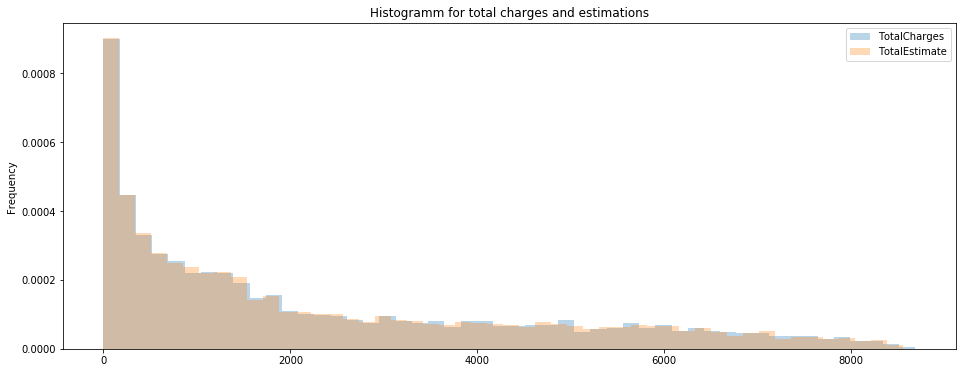

In [27]:
# Calculation of differences
tmp = df_merged[['MonthlyCharges', 'TotalCharges', 'Duration']].copy()
tmp['YearlyCharges'] = tmp['MonthlyCharges']*12
tmp['DurationYear'] = tmp['Duration']/365
tmp['TotalEstimate'] = tmp['YearlyCharges']*tmp['DurationYear']

# Plot Overview over real tottal charges and total estimates
for col in ['TotalCharges', 'TotalEstimate']:
    tmp[col].plot(kind='hist',
                  density=True,
                  alpha=.3, 
                  legend=True,
                  figsize=(16,6),
                  bins=50,
                  title='Histogramm for total charges and estimations',
                  xlabel='Total Costs'
                 )

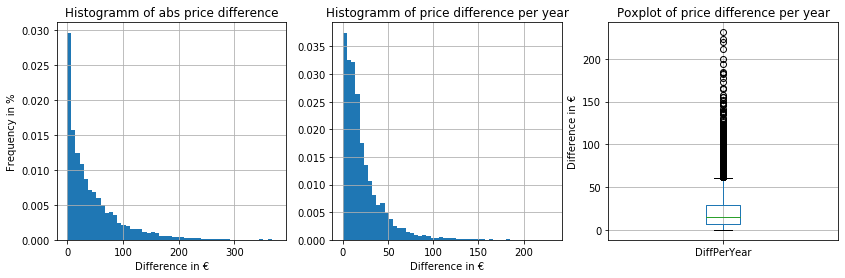

In [28]:
# calculation of diffPerYear
tmp['Diff'] = abs(tmp['TotalEstimate'] - tmp['TotalCharges'])
tmp['DiffPerYear'] = tmp['Diff'] / (tmp['Duration']/365)

# Plottig hists and Boxplots for checking for outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
tmp['Diff'].hist(bins=50, density=True, ax=axes[0])
tmp['DiffPerYear'].hist(bins=50, density=True, ax=axes[1])
tmp['DiffPerYear'].plot(kind='box', grid=True, ax=axes[2])

axes[0].set_title('Histogramm of abs price difference')
axes[0].set_ylabel('Frequency in %')
axes[0].set_xlabel('Difference in €')

axes[1].set_title('Histogramm of price difference per year')
axes[1].set_xlabel('Difference in €')

axes[2].set_title('Poxplot of price difference per year')
axes[2].set_ylabel('Difference in €')

plt.show();

> There are outliers in the Costs. they have been investigated now further

In [29]:
# Check df values for calculation of limit for outliers
tmp['DiffPerYear'].describe()

count    7032.000000
mean       21.852662
std        22.831636
min         0.001898
25%         7.048491
50%        14.840831
75%        28.762562
max       231.050000
Name: DiffPerYear, dtype: float64

In [30]:
# Calculating limit for outliers
limit = 1.5 * (28.76-7.05) + 28.76
limit

61.325

In [31]:
# Checking outlier only
tmp.query('DiffPerYear > @limit').describe()

,MonthlyCharges,TotalCharges,Duration,YearlyCharges,DurationYear,TotalEstimate,Diff,DiffPerYear
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,75.186493,790.446682,288.303318,902.237915,0.789872,798.923773,63.330089,88.499160
std,21.380373,1067.889484,327.029992,256.564473,0.895973,1074.389387,63.942908,28.634443
min,18.750000,27.550000,61.000000,225.000000,0.167123,38.219178,10.299178,61.379070
25%,65.512500,193.750000,92.000000,786.150000,0.252055,194.769863,23.135240,68.327967
50%,79.625000,401.400000,168.000000,955.500000,0.460274,406.309315,41.249247,79.395485
75%,90.675000,923.912500,358.000000,1088.100000,0.980822,969.195205,79.534349,98.438576
max,116.450000,8013.550000,2191.000000,1397.400000,6.002740,8388.228493,374.678493,231.050000


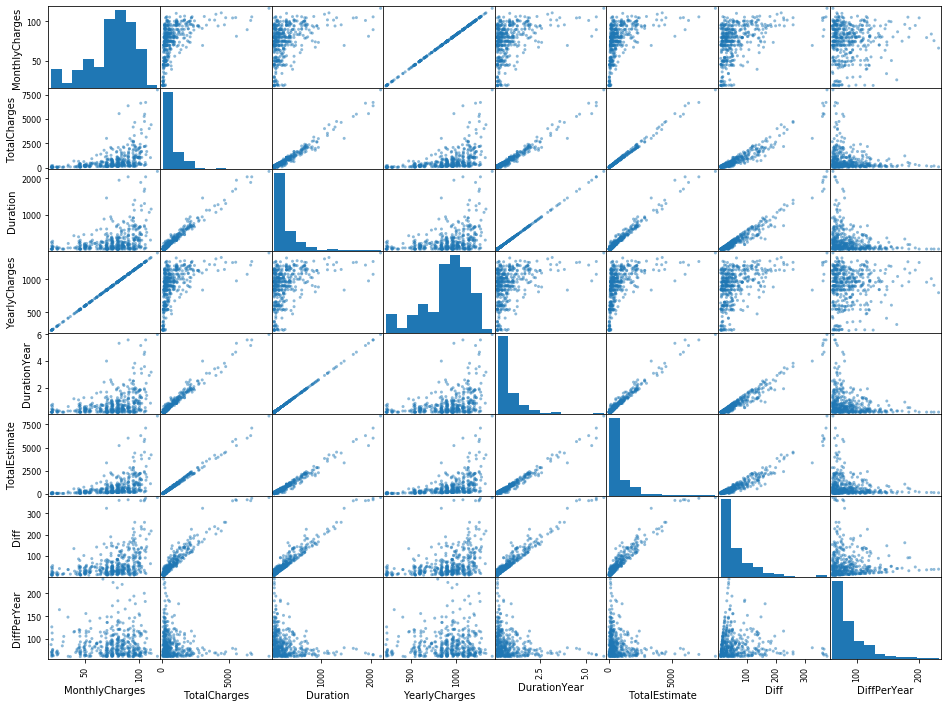

In [32]:
# Scatter matrix for outliers to get correlations
pd.plotting.scatter_matrix(tmp.query('DiffPerYear > @limit'), figsize=(16,12));

> **Observations:**
> - diffPerYear / Duration scatteplot shows an overproportional high frequency of contracts with less than 300 days   
> \-\> This could be the matter because of some offers/basic costs which are influencing short term contracts / new contracts drastically whereas long contracts are not influenced heavily. Therefore This feature has not been added to the dataframe.


# 3. EDA

## 3.1. Check Class balance

> In this step the class balance has been checked for later model training

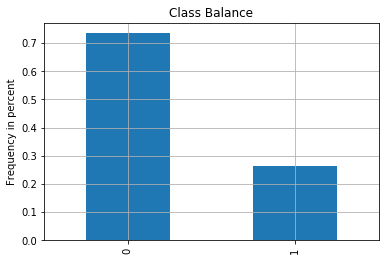

In [33]:
title = 'Class Balance'
ylabel = 'Frequency in percent'
df_merged['churned'].value_counts(normalize=True)\
                     .plot(kind='bar',
                           grid=True,
                           title=title, 
                           ylabel=ylabel);

> **Observations:**  
> The classes are imbalanced, while there are only around 28% churned customer, there are 72% non churned customers  
> \-\> Upsampling/downsampling/weighting needed

## 3.2. Corellation matrix

> In this step the correlation matrix of the dataframe has been plotted to get an understanding of the linear correlation of the features

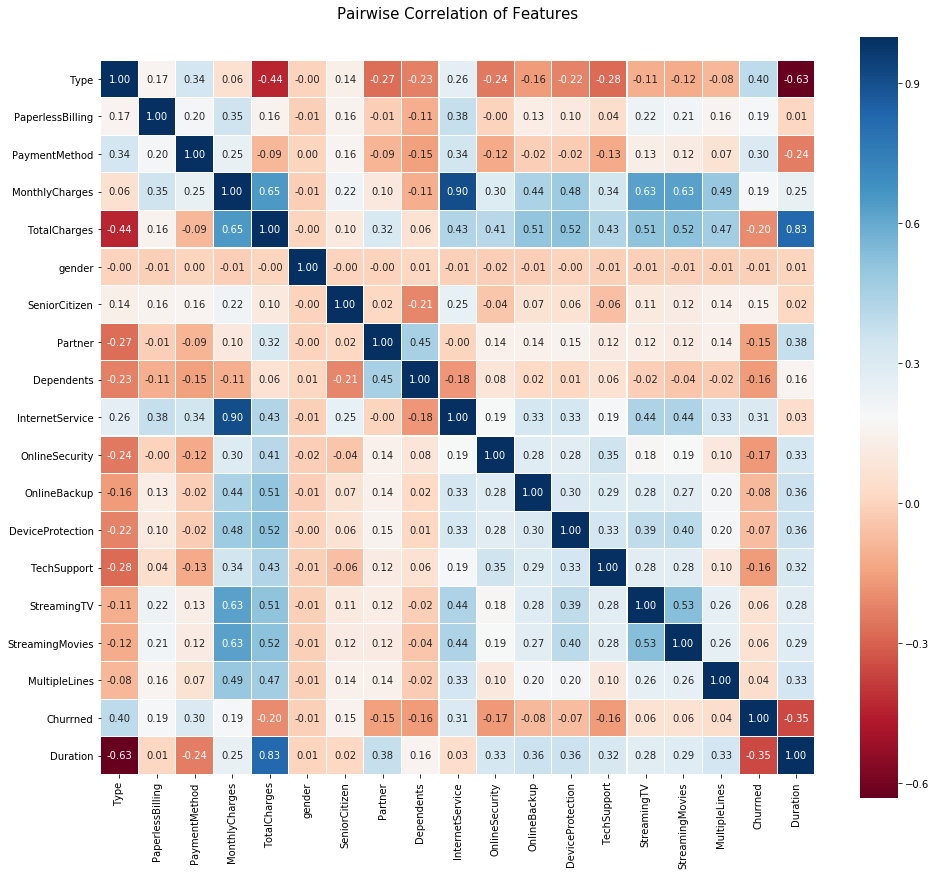

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Pairwise Correlation of Features', y=1.05, size=15)
sns.heatmap(df_merged.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2f');

> **Observations:**
> - Gender does not have any correlation to any other fearure (at least nothing linear)
> - Duration and type as well as duration and total charges have strong correlations
> - Monthly charges has a strong correltaions with total charges as well as with the booked features like internet service (the highest influence on the price), streaming (second highest influence, online backup, multiple lines...
> - Type and duration have the highest correlation towards the churned column

## 3.2. Influence of boolean categories

> In therms of visibility, the boolean collumns have not been plotted as paiwise boxplots but as barplot with their corresponding mean values

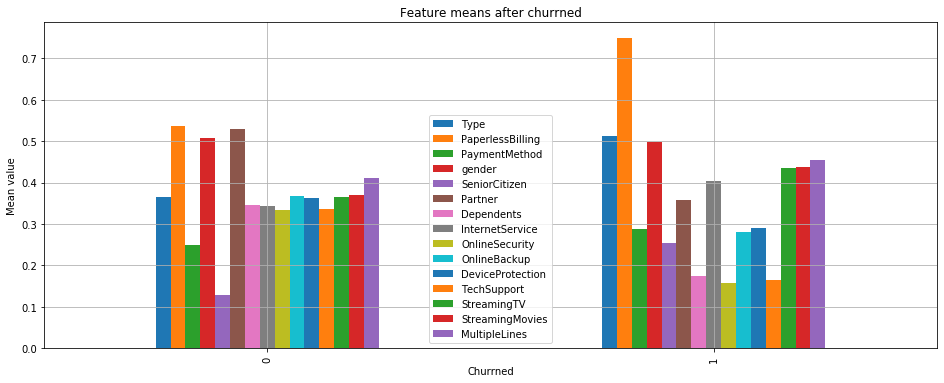

In [35]:
# Plotting of boolean features as barplot
df_merged.drop(['MonthlyCharges', 'TotalCharges', 'Duration'], axis=1)\
         .groupby('churned')\
         .agg('mean')\
         .plot(kind='bar', 
               figsize=(16,6), 
               legend=True,
               grid=True,
               title='Feature means after churned',
               ylabel='Mean value'
              );

> **Observations:**
> - Senior citicens are more likely to churn
> - The booking of additional features seem to reduce the number of churns
> - People with paperless billing seem to tend more to churning then customer with per billing
> - Customers with partner and dependend seem to be more unlikely to churn  
> \-\> Here are leverages to bind customers better to the company

## 3.3. Boxplots Total and Monthly charges

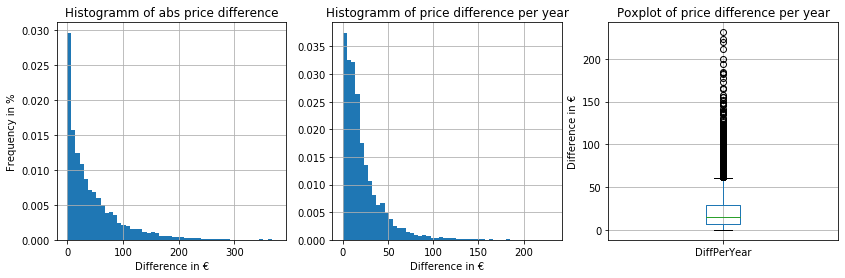

In [36]:
# calculation of diffPerYear
tmp['Diff'] = abs(tmp['TotalEstimate'] - tmp['TotalCharges'])
tmp['DiffPerYear'] = tmp['Diff'] / (tmp['Duration']/365)

# Plottig hists and Boxplots for checking for outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
tmp['Diff'].hist(bins=50, density=True, ax=axes[0])
tmp['DiffPerYear'].hist(bins=50, density=True, ax=axes[1])
tmp['DiffPerYear'].plot(kind='box', grid=True, ax=axes[2])

axes[0].set_title('Histogramm of abs price difference')
axes[0].set_ylabel('Frequency in %')
axes[0].set_xlabel('Difference in €')

axes[1].set_title('Histogramm of price difference per year')
axes[1].set_xlabel('Difference in €')

axes[2].set_title('Poxplot of price difference per year')
axes[2].set_ylabel('Difference in €')

plt.show();

C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

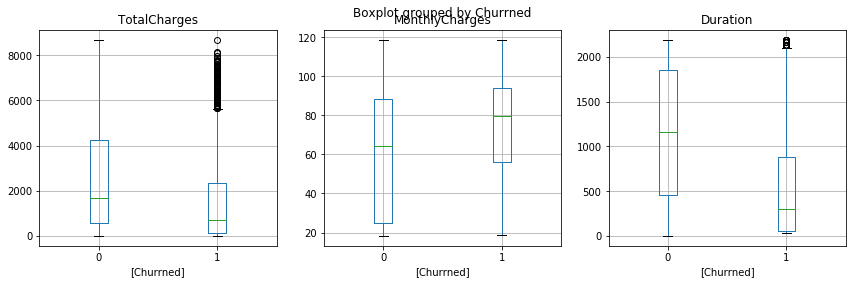

In [37]:
# Plottig hists and Boxplots for checking for outliers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for i, col in enumerate (['TotalCharges', 'MonthlyCharges', 'Duration']):
    df_merged[[col, 'churned']].boxplot(by='churned', ax=axes[i])
plt.show()

> **Observations:**
> - Contracts with high monthly costs are more likely to churn
> - New customers are more likely to churn

## 3.4. Contracts over the year

> In this step the count of new contracts over time has been plotted

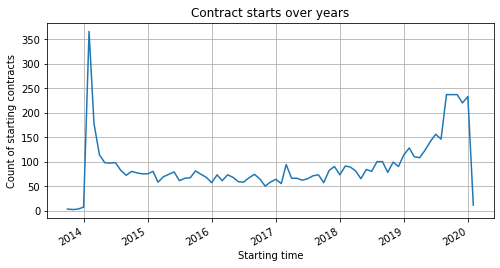

In [38]:
title = 'Contract starts over years'
y_label = 'Count of starting contracts'
x_label = 'Starting time'

df_merged.BeginDate.value_counts().plot(figsize=(8,4),
                                        title=title,
                                        ylabel=y_label,
                                        xlabel=x_label,
                                        grid=True
                                       );

> **Observations:**
> - In 2014 and 2020 were two peaks of new contracts per month/year
> - Between 2014 and 2019 the number of contracts was nearly stable in a corridor between 50 and 100 contrcts per month

> In this step the count of churned contracts has been plotted

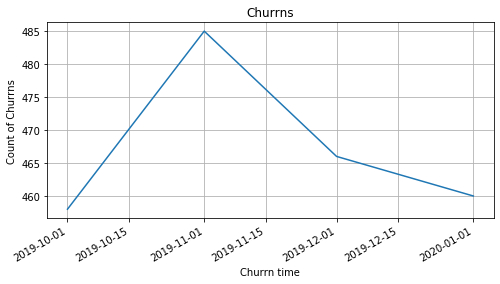

In [39]:
title = 'churns'
y_label = 'Count of churns'
x_label = 'churn time'

filt = df_merged.EndDate != 'No'
df_merged.loc[filt].FilledEndDate.value_counts()\
                                 .plot(figsize=(8,4),
                                       title=title,
                                       ylabel=y_label,
                                       xlabel=x_label,
                                       grid=True
                                       );

> **Observations:**
> - There were no churns until Oktober 2019
> - After Oktober 2019 the churns were on a level of 460 - 485 per month (Maybe a rise in pricing?)

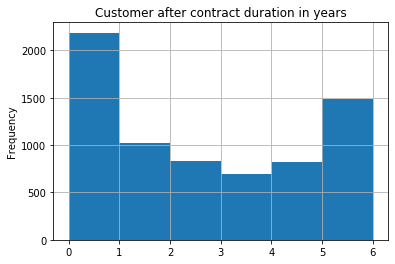

In [40]:
title = 'Customer after contract duration in years'
(df_merged['Duration'] / 365).plot(kind='hist',
                                   title=title,
                                   ylabel='Customer',
                                   xlabel='Contract duration in years',
                                   grid=True,
                                   bins=6
                                  );

# 4. Dropping non necessary columns

> In preparation for model training the non necessary columns and the columns which could cause data leakage have been dropped

In [41]:
to_drop=['BeginDate', 'EndDate', 'FilledEndDate']
df_merged = df_merged.drop(to_drop, axis=1)
df_merged

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churrned,Duration
0,0.550192,1,0.335794,29.85,29.85,0,0,1,0,0.343746,0,1,0,0,0,0,0,0,31
1,0.209144,0,0.228880,56.95,1889.50,1,0,0,0,0.343746,1,0,1,0,0,0,0,0,1036
2,0.550192,1,0.228880,53.85,108.15,1,0,0,0,0.343746,1,1,0,0,0,0,0,1,61
3,0.209144,0,0.219225,42.30,1840.75,1,0,0,0,0.343746,1,0,1,1,0,0,0,0,1371
4,0.550192,1,0.335794,70.70,151.65,0,0,0,0,0.439585,0,0,0,0,0,0,0,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.209144,1,0.228880,84.80,1990.50,1,0,1,1,0.343746,1,0,1,1,1,1,1,0,730
7039,0.209144,1,0.216101,103.20,7362.90,0,0,1,1,0.439585,0,1,1,0,1,1,1,0,2191
7040,0.550192,1,0.335794,29.60,346.45,0,0,1,1,0.343746,1,0,0,0,0,0,0,0,337
7041,0.550192,1,0.228880,74.40,306.60,1,1,1,0,0.439585,0,0,0,0,0,0,1,1,123


# 5. Model Building


## 5.1. Data splitting

> In the first step of model training, the dataframe has been splitted and the featues and targets have been defined

In [42]:
# Definition of features and targets
features = df_merged.drop(['churned'], axis=1)
target = df_merged['churned']

# Split For unbalanced model
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    train_size=0.8,
                                                    random_state = RANDOM_STATE
                                                   )
# For up and downsampling
df_train, df_test = train_test_split(df_merged,
                                    train_size=0.8,
                                    random_state = RANDOM_STATE
                                    )

In [43]:
# Checking for equal distribution of target within splits
print(f'Train: {round(df_train.churned.mean(), 4)*100} % churned')
print(f'Test: {round(df_test.churned.mean(), 4)*100} % churned')

Train: 26.55 % Churrned
Test: 26.47 % Churrned


## 5.2. Dealing with class imbalance

> For tackeling the class imbalance (3:1) different tactics have been used within this project, upsampling, downsampling and weighted training  
> In preparation the neccessary values have been calculated in that step

In [44]:
# Get count of each class of trainings dataframe only to not distort real distribution in test set
cnt_c0, cnt_c1 = df_train.churned.value_counts()

# Investigating imbalance for train set
df_c0_train = df_train[df_train['churned']==0]
df_c1_train = df_train[df_train['churned']==1]

### 5.2.1. Upsameling

> In this step the underrepresented Class has been upsampled (Better might be SMOTE)

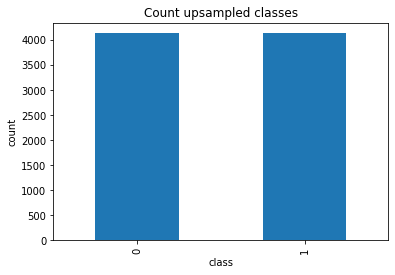

In [45]:
# Upsample underrepresened class
df_c1_ups = df_c1_train.sample(cnt_c0, random_state=RANDOM_STATE, replace=True)

# Concat data of upsampled class 1 and class 0
df_us = shuffle(pd.concat([df_c1_ups, df_c0_train]))

# Split in train and test df
X_train_us = df_us.drop('churned', axis=1)
y_train_us = df_us['churned']

# Plott result
ax = df_us.churned.value_counts().plot(kind='bar',
                                        title='Count upsampled classes');
ax.set_xlabel('class')
ax.set_ylabel('count')
plt.show()

### 5.2.2. Downsampeling

> In this step the overrepresented class has been downsampled

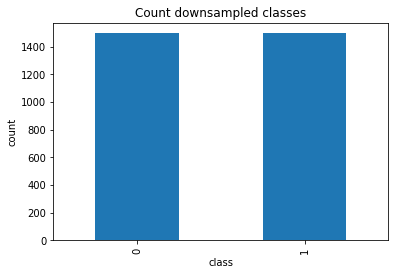

In [46]:
# Downsample overrepresented class
df_c0_down = df_c0_train.sample(cnt_c1, random_state=RANDOM_STATE)

# Concat downsampled df and df_c1
df_ds = shuffle(pd.concat([df_c0_down, df_c1_train]))

# Split in train and test df
X_train_ds = df_ds.drop('churned', axis=1)
y_train_ds = df_ds['churned']

# Plot results
ax = df_ds.churned.value_counts().plot(kind='bar',
                                        title='Count downsampled classes');
ax.set_xlabel('class')
ax.set_ylabel('count')
plt.show()

### 5.2.3. Class weig

> The to expecting class weight has been calculated

In [47]:
# Manual calculated in comparison with 'balanced later on'
class_weights = {0: 1.0, 1: 1/df_merged.churned.mean()}
class_weights

{0: 1.0, 1: 3.76832530765115}

## 5.3. Model selection

> In this step first the best performing standard models have been identified via cross validation  
> In the beginning lgboost and xgboost were not considered and added due to the low perfomence of the other used models.  
> Thus in the model building all models have been built and tuned not just the top three as in the model plan indicated

In [48]:
# Creating pipeline for the Scaling of the categorical values
numerical_features = ['MonthlyCharges', 'TotalCharges', 'Duration']
categorical_features = [col for col in X_train.columns if col not in numerical_features]

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

In [49]:
def create_pipe(class_weight=None):
    models={'Dummy': DummyClassifier(),
            'Logreg': LogisticRegression(class_weight=class_weight),
            'SV': SVC(class_weight=class_weight),
            'KNN': KNeighborsClassifier(),
            'RFC': RandomForestClassifier(random_state=RANDOM_STATE, class_weight=class_weight),
            'GBM': GradientBoostingClassifier(random_state=RANDOM_STATE),
            'XGB': xgb.XGBClassifier(),
            'LGB': lgb.LGBMClassifier()
           }
    pipe = [(k, Pipeline([('preprocessor', preprocessor), ('Logreg', v)])) for k, v in models.items()]
    
    return pipe

def cv_piped_models(pipe, X_train, y_train):
    results = []
    names = []
    for name, model in pipe:
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        results.append(cv_results)
        names.append(name)
    return(results, names)

def plot_feature_importances(model):
    # Plotting feature importance
    pd.DataFrame(
        model.feature_importances_,
        columns=['feature importance'],
        index=list(X_train.columns))\
      .sort_values('feature importance')\
      .plot(kind='barh',
            figsize=(12,6),
            title='Feature importance',
            xlabel='Features',
            ylabel='Importance',
            grid=True
           );

In [50]:
import warnings 

with warnings.catch_warnings() as w:
    warnings.filterwarnings("ignore")  
    results = []
    names = []
    pipe = create_pipe()
    dfs = [
        [X_train, y_train],
        [X_train_us, y_train_us],
        [X_train_ds, y_train_ds]
    ]
    # Unweighted with normal data
    for (x, y) in dfs:
        result, name = cv_piped_models(pipe, x, y)
        results.append([np.round(np.mean(r), 3) for r in result])
        names.append(name)

    # weighted
    pipe = create_pipe(class_weight=class_weights)
    result, name = cv_piped_models(pipe, X_train, y_train)
    results.append([np.round(np.mean(r), 3) for r in result])
    names.append(name)

    idx = ['unbalanced', 'upsampled', 'downsampled', 'weighted']
    display(pd.DataFrame(results, columns=names[0], index=idx).transpose())

[22:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,unbalanced,upsampled,downsampled,weighted
Dummy,0.500,0.500,0.500,0.500
Logreg,0.836,0.840,0.831,0.837
SV,0.791,0.851,0.821,0.817
KNN,0.758,0.850,0.767,0.758
RFC,0.840,0.982,0.847,0.840
GBM,0.884,0.898,0.875,0.884
XGB,0.893,0.970,0.881,0.893
LGB,0.887,0.957,0.875,0.887


> **Observation:**  
> - The downsampled cross validation with standard models has the best results  
> \-\> The downsampled df will be used for their training

> - The upsampled cross validation with XGB/LGB models has the best results together with weighted
> \-\> Weighted parameter will be used as hyperparameter during training with standrd df, compare with upsampled df

## 5.4 Model development

> In this chapter the models have been built, and evaluated as well as their hyperparameters have been tuned

> For every Algorithm, the standard setting have been evaluated, then the hyperparameter have been tuned in multiple rounds if the results were good enaugh and finally evaluated on the test dataset

In [51]:
# Helper Functions
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('preprocessor', preprocessor),('model', model)])
    pipe.fit(X_train, y_train)
    predictions_proba = pipe.predict_proba(X_test)[:, 1]
    ar_score = roc_auc_score(y_test, predictions_proba)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions_proba) 

    plt.figure()
    plt.plot(fpr, tpr,linestyle='-',linewidth=2,)

    # ROC curve for random model (looks like a straight line)
    plt.plot([0, 1], [0, 1], linestyle='-')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve downsampled')

    plt.show()
    
    print(f'ROC-AUC score: {round(ar_score, 3)}')

def convert_param_dict(param_dict):
    '''Converts the best param dict to a dict for model building due to different nominklatur'''
    import re
    pattern = r'(.)*__'
    return {re.sub(pattern, '',  k): v for k, v in param_dict.items()}


### 5.4.1. Logreg

#### 5.4.1.1. Hyperparameter Tuning

In [52]:
pipe_Logreg_tun = Pipeline([('preprocessor', preprocessor),('LOGREG', LogisticRegression())])

# Same procedure than with Random forests with those params:
param_grid = {
    'LOGREG__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'LOGREG__penalty': ['l2'],
    'LOGREG__C': [1000, 100, 10, 1.0, 0.1, 0.01],
    'LOGREG__max_iter': [i for i in range(100,6001,100)]
    }


skf = StratifiedKFold(n_splits=5)

rand_search = RandomizedSearchCV(
    estimator = pipe_Logreg_tun,
    param_distributions=param_grid, 
    n_iter=150,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train_ds, y_train_ds);
    joblib.dump(rand_search, '.\logreg_rand_search.joblib')
else:
    rand_search = joblib.load('.\logreg_rand_search.joblib')

print(f'Best random grid search score {rand_search.best_score_}')


Best random grid search score 0.8361866794927723


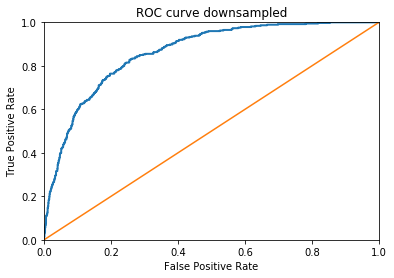

ROC-AUC score: 0.862


In [53]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = LogisticRegression(**params)
evaluate_model(model, X_train_ds, X_test, y_train_ds, y_test)

> Even if ROC AUC score improved ruring hyperparameter tuning, quality is too bad, no further hyperparameter tuning

### 5.4.2. SVC

#### 5.4.2.1. Hyperparameter Tuning

In [54]:
pipe_SVC_tun = Pipeline([('preprocessor', preprocessor),('SVC', SVC())])

# Create the random grid with selected arguments
param_grid = {'SVC__kernel' : ['poly', 'rbf', 'sigmoid'],
              'SVC__C' : [50, 10, 1.0, 0.1, 0.01],
              'SVC__gamma' : ['scale']}


skf = StratifiedKFold(n_splits=5)

rand_search = RandomizedSearchCV(
    estimator = pipe_SVC_tun,
    param_distributions=param_grid, 
    n_iter=150,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train_ds, y_train_ds);
    joblib.dump(rand_search, '.\SVC_rand_search.joblib')
else:
    rand_search = joblib.load('.\SVC_rand_search.joblib')

print(f'Best random grid search score {rand_search.best_score_}')

Best random grid search score 0.8207879404779217


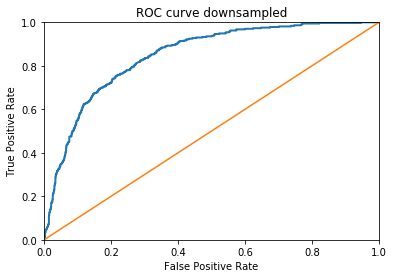

ROC-AUC score: 0.847


In [55]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = SVC(probability=True, **params)
evaluate_model(model, X_train_ds, X_test, y_train_ds, y_test)

> Even if ROC AUC score improved ruring hyperparameter tuning, quality is too bad, no further hyperparameter tuning

### 5.4.3. RFC

### 5.4.3.1. Hyperparameter Tuning

In [56]:
pipe_RFC_tun = Pipeline([('preprocessor', preprocessor),('RFC', RandomForestClassifier(random_state=RANDOM_STATE))])

# Aggregating random grid for both rand grid searches
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid with selected arguments
param_grid = {'RFC__n_estimators': n_estimators,
              'RFC__max_features': max_features,
              'RFC__max_depth': max_depth,
              'RFC__min_samples_split': min_samples_split,
              'RFC__min_samples_leaf': min_samples_leaf,
              'RFC__bootstrap': bootstrap
             }


skf = StratifiedKFold(n_splits=5)

rand_search = RandomizedSearchCV(
    estimator = pipe_RFC_tun,
    param_distributions=param_grid, 
    n_iter=500,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train_ds, y_train_ds);
    joblib.dump(rand_search, '.\RFC_rand_search.joblib')
else:
    rand_search = joblib.load('.\RFC_rand_search.joblib')

print(f'Best random grid search score {rand_search.best_score_}')

Best random grid search score 0.8535124961316616


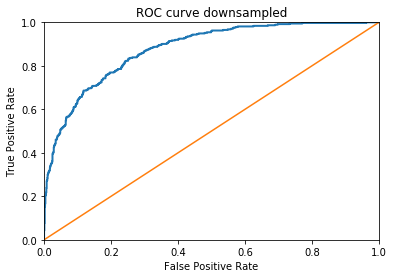

ROC-AUC score: 0.878


In [57]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = RandomForestClassifier(**params)
evaluate_model(model, X_train_ds, X_test, y_train_ds, y_test)

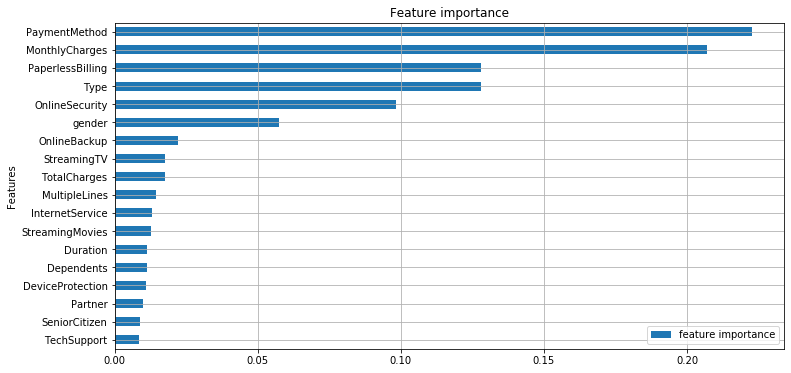

In [58]:
plot_feature_importances(model)

> Even if ROC AUC score improved ruring hyperparameter tuning, quality is too bad, no further hyperparameter tuning

### 5.4.4. GBM

#### 5.4.4.1. Hyper Parameter Tuning

In [59]:
pipe_GBM_tun = Pipeline([('preprocessor', preprocessor),('GBM', GradientBoostingClassifier(random_state=RANDOM_STATE))])

# Assembling param Grid for randomized grid serach
param_grid = {
    'GBM__n_estimators':  list(int(e) for e in np.linspace(30,100,21)),
    'GBM__max_depth': list(range(1,21)),
    'GBM__min_samples_leaf': list(range(1,11)),
    'GBM__min_samples_split': list(range(1,11))
}

skf = StratifiedKFold(n_splits=5)

rand_search = RandomizedSearchCV(
    estimator = pipe_GBM_tun,
    param_distributions=param_grid, 
    n_iter=100,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train_ds, y_train_ds);
    joblib.dump(rand_search, '.\Gradient_boost_rand_search.joblib')
else:
    rand_search = joblib.load('.\Gradient_boost_rand_search.joblib')

print(f'Best random grid search score {rand_search.best_score_}')

Best random grid search score 0.8772967006334754


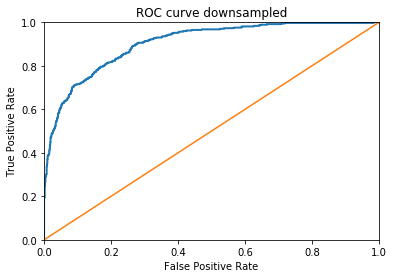

ROC-AUC score: 0.905


In [60]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = GradientBoostingClassifier(**params)
evaluate_model(model, X_train_ds, X_test, y_train_ds, y_test)

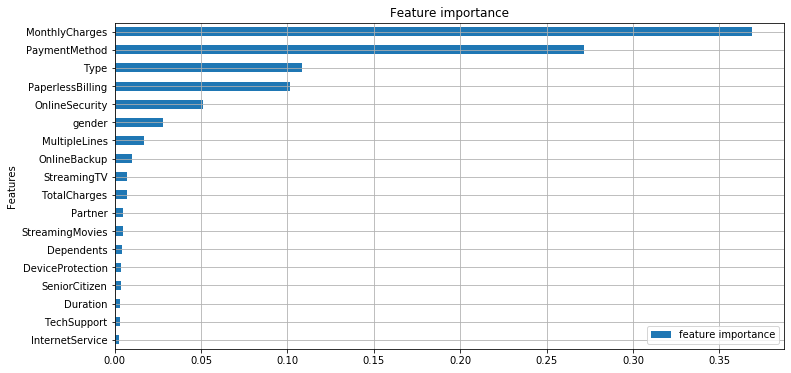

In [61]:
plot_feature_importances(model)

> Even if ROC AUC score improved ruring hyperparameter tuning, quality is too bad, no further hyperparameter tuning

**Because all the standard classifiere had unsufficient results, more complex boosting classifier have been trained**

### 5.4.5. LightGBM

#### 5.4.5.1. Hyperparameter Tuning first round

In [62]:
pipe_LGB_tun = Pipeline([('preprocessor', preprocessor),('LGB', lgb.LGBMClassifier(random_state=RANDOM_STATE))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


param_grid = {    
    'LGB__boosing_type': ['gbdt'],
    'LGB__num_leaves': list(int(e) for e in np.linspace(2,256,50)),
    'LGB__max_depth': list(int(e) for e in np.linspace(1,16,16)),
    'LGB__learning_rate': np.linspace(0,1,10),
    'LGB__n_estimators': [10, 100, 500, 1000, 5000],
    'LGB__reg_alpha': np.linspace(1, 100, 100),
    'LGB__reg_lambda': np.linspace(1, 100, 100),
    'LGB__scale_pos_weight': np.linspace(1, 4, 5)   
}

rand_search = RandomizedSearchCV(
    estimator = pipe_LGB_tun,
    param_distributions=param_grid, 
    n_iter=1500,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train, y_train);
    joblib.dump(rand_search, '.\LGB_rand_search.joblib')
else:
    rand_search = joblib.load('.\LGB_rand_search.joblib')

print(f'Best random grid search score {rand_search.best_score_}')


Best random grid search score 0.9003544806263631


In [63]:
params = convert_param_dict(rand_search.best_params_)
params

{'scale_pos_weight': 4.0,
 'reg_lambda': 27.0,
 'reg_alpha': 3.0,
 'num_leaves': 53,
 'n_estimators': 5000,
 'max_depth': 4,
 'learning_rate': 0.1111111111111111,
 'boosing_type': 'gbdt'}

> The parameter seem to be quite okay but some of them are at the uppper and lower range of that limit. THerefore a more fingranular randomized grid search has been carried out to com even closer to the perfect parameter set

#### 5.4.5.2. Hyperparameter Tuning second round

In [64]:
pipe_LGB_grid = Pipeline([('preprocessor', preprocessor),('LGB', lgb.LGBMClassifier(random_state=RANDOM_STATE))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


param_grid = {    
    'LGB__boosing_type': ['gbdt'],
    'LGB__num_leaves': list(int(e) for e in np.linspace(50,60,10)),
    'LGB__max_depth': list(int(e) for e in np.linspace(2,6,6)),
    'LGB__learning_rate': np.linspace(0, .22, 10),
    'LGB__n_estimators': [4500, 5000, 6000],
    'LGB__reg_alpha': np.linspace(1, 5, 5),
    'LGB__reg_lambda': np.linspace(25, 30, 6),
    'LGB__scale_pos_weight': np.linspace(3, 5, 10)   
}

rand_search = RandomizedSearchCV(
    estimator = pipe_LGB_grid,
    param_distributions=param_grid, 
    n_iter=1000,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train, y_train);
    joblib.dump(rand_search, '.\LGB_rand_search1.joblib')
else:
    rand_search = joblib.load('.\LGB_rand_search1.joblib')

print(f'Best random grid search score {rand_search.best_score_}')

Best random grid search score 0.9109180783796414


[LightGBM] [Warning] Unknown parameter: boosing_type


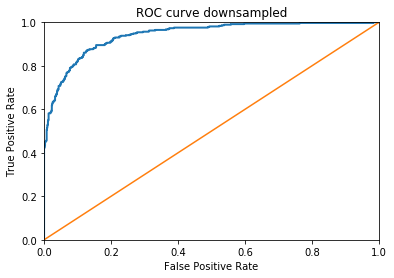

ROC-AUC score: 0.942


In [65]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = lgb.LGBMClassifier(random_state=RANDOM_STATE, **params)
evaluate_model(model, X_train, X_test, y_train, y_test)

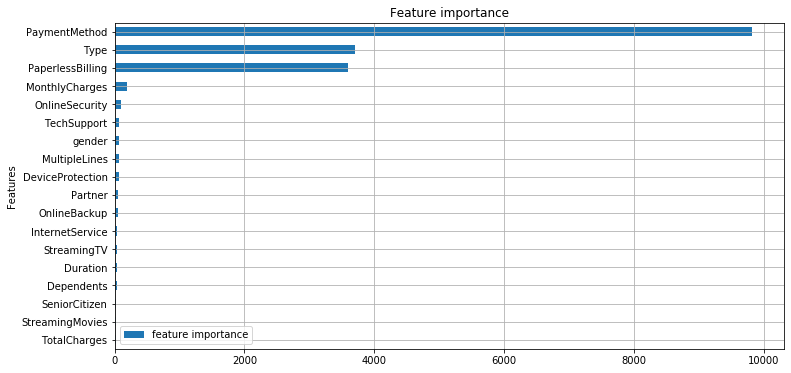

In [66]:
plot_feature_importances(model)

> The roc auc score is sufficient

### 5.4.6. XGBoost

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, here you correctly use XGBClassfier, not XGBRegressor, so that must have been a misprint

</div>

#### 5.4.6.1. Hyperparameter tining first round

In [67]:
pipe_XGB_tun = Pipeline([('preprocessor', preprocessor),('XGB', xgb.XGBClassifier(random_state=RANDOM_STATE))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
param_grid = {
    'XGB__max_depth': [2, 3, 5, 7, 10],
    'XGB__n_estimators': [10, 100, 500, 1000, 1500],
    'XGB__gamma': np.linspace(0,1,10),
    'XGB__reg_alpha' : np.linspace(0,50,30),
    'XGB__reg_lambda' : np.linspace(10,100,10),
    'XGB__colsample_bytree' : list(int(e) for e in np.linspace(0,1,10)),
    'XGB__min_child_weight' : list(int(e) for e in np.linspace(0,6,5)),
    'XGB__learning_rate': np.linspace(0,1,10),
    'XGB__scale_pos_weight': np.linspace(1,6,10),
    'XGB__max_bin' : list(int(e) for e in np.linspace(200,500, 5)),
}

rand_search = RandomizedSearchCV(
    estimator = pipe_XGB_tun,
    param_distributions=param_grid, 
    n_iter=1500,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train, y_train);
    joblib.dump(rand_search, '.\XGB_rand_search_1.joblib')
else:
    rand_search = joblib.load('.\XGB_rand_search_1.joblib')

print(f'Best random grid search score {rand_search.best_score_}')


Best random grid search score 0.9073960008135897


In [68]:
params = convert_param_dict(rand_search.best_params_)
params

{'scale_pos_weight': 3.7777777777777777,
 'reg_lambda': 10.0,
 'reg_alpha': 3.4482758620689653,
 'n_estimators': 1000,
 'min_child_weight': 4,
 'max_depth': 10,
 'max_bin': 275,
 'learning_rate': 0.3333333333333333,
 'gamma': 0.1111111111111111,
 'colsample_bytree': 0}

> The parameter seem to be quite okay but some of them are at the uppper and lower range of that limit. THerefore a more fingranular randomized grid search has been carried out to com even closer to the perfect parameter set

#### 5.4.6.2. Hyperparameter tuning second round 

In [69]:
pipe_XGB_tun = Pipeline([('preprocessor', preprocessor),('XGB', xgb.XGBClassifier(random_state=RANDOM_STATE))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
param_grid = {
    'XGB__max_depth': [2, 3, 5, 7, 10],
    'XGB__n_estimators': [10, 100, 500, 1000, 1500],
    'XGB__gamma': np.linspace(0,1,10),
    'XGB__reg_alpha' : np.linspace(1,5,11),
    'XGB__reg_lambda' : np.linspace(5,15,11),
    'XGB__colsample_bytree' : list(int(e) for e in np.linspace(0,1,10)),
    'XGB__min_child_weight' : list(int(e) for e in np.linspace(0,6,7)),
    'XGB__learning_rate': np.linspace(.2, .45, 10),
    'XGB__scale_pos_weight': np.linspace(3.5, 4, 10),
    'XGB__max_bin' : list(int(e) for e in np.linspace(200,300, 5)),
}

rand_search = RandomizedSearchCV(
    estimator = pipe_XGB_tun,
    param_distributions=param_grid, 
    n_iter=1000,
    scoring='roc_auc',
    cv=skf,
    verbose=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

retrain = 0
if retrain:
    rand_search.fit(X_train, y_train);
    joblib.dump(rand_search, '.\XGB_rand_search_2.joblib')
else:
    rand_search = joblib.load('.\XGB_rand_search_2.joblib')

print(f'Best random grid search score {rand_search.best_score_}')

Best random grid search score 0.9119396462213691


[22:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JonathanLang\.conda\envs\practicum\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


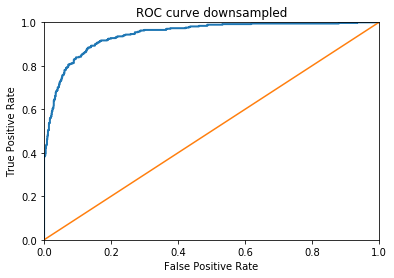

ROC-AUC score: 0.945


In [70]:
# Envaluation of Parameter on real model
params = convert_param_dict(rand_search.best_params_)
model = xgb.XGBClassifier(random_state=RANDOM_STATE, **params)
evaluate_model(model, X_train, X_test, y_train, y_test)

> The xgboost has the best score after hyperparameter tuning but is only slightly better than lgboost

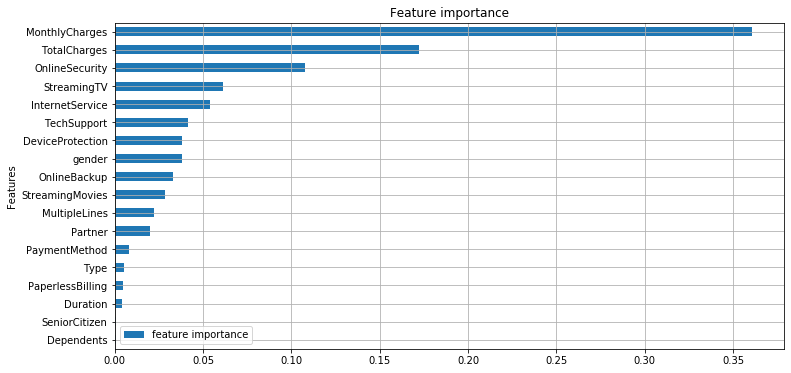

In [71]:
# Plotting feature importance
pd.DataFrame(
    model.feature_importances_,
    columns=['feature importance'],
    index=list(X_train.columns))\
  .sort_values('feature importance')\
  .plot(kind='barh',
        figsize=(12,6),
        title='Feature importance',
        xlabel='Features',
        ylabel='Importance',
        grid=True
       );

# 6. Fazit

Within this project the following steps have been carried out:
- Loading the data and getting an understanding of it
- Creating a detailed project plan
- Data preprocessing
- EDA
- Splitting and sampling the data
- Performance evaluation with crossvalidation
- Model building, evaluation and hyperparameter tuning

The final model has an ROC AUC score of round about 95% and is quite sufficient to predict the customers who churn to give them offers which might change their minds to stay 

For the tree based models standard scaling could have been skipped. Same applies for the categorical frequency encoding for regressors like lgb and xgb.

For binding the customers to the company the following measures are proposed:
- checking why the Churns started in Oktober 2019 and take measures against the cause
- Trying to bind new clients more to the company cause once they stay for a longer time they are more likely to stay
- Try to upsell their additional services especially streaming cause it makes churns unlikely
- Try to sell more cheep contracts cause those customers are more unlikely to churn
- Use the developed model to check who is going to churn and make those clients offers in advance


Further Things to carry out eventually:
- Imporve model quality by stacking / blending because different models have different important features
- Engineer further features (together with the client)
